# Least Squares Curve Fitting

In [1]:
function C = lspoly(X,Y,M)
% Fit an M-degree polynomial
% Input     - X is the nx1 abscissa vector
%           - Y is the nx1 ordinate vector
%           - M is the degree of the least-squares polynomial
% Output - C is the coefficient list for the polynomial

n = length(X);
B = zeros(1:M+1);
F = zeros(n,M+1);

%Fill the columns of F with the powers of X

for k=1:M+1
   F(:,k)=X.^(k-1);
end

%Solve the normal linear system 

A=F'*F;
B=F'*Y;
C=A\B;
C=flipud(C);

end %function lspoly

error: graphics_toolkit: qt toolkit is not available
error: called from
    graphics_toolkit at line 81 column 5



In [2]:
function [X,Y] = generatedata(n,maxy)
% Generate the data with uniform X from 0 to n
% and random Y from 0 to maxy
% n and maxy are positive integers
X = [0:1:n]';
Y = fix(rand(n+1,1)*(maxy+1));
end %function generatedata

In [10]:
function plotlscurves(X,Y)
%Input   - X is a vector that contains a list of abscissas
%        - Y is a vector that contains a list of ordinates
    clf;
    axis([min(X) max(X) min(Y)-1 max(Y)+1]);
    hold on
    XP = linspace(min(X),max(X),101);
    
    LSC1 = lspoly(X,Y,1);  %fit a line
    LSC2 = lspoly(X,Y,3);  %fit a cubic polynomial
    LSC3 = lspoly(X,Y,5);  %fit a degree-5 polynomial
    cla;
    plot(X,Y,'ro');
    legdata={'Data'};
    plot(XP,polyval(LSC1,XP),'k-');
    legdata=[legdata,{'LS Line'}];
    plot(XP,polyval(LSC2,XP),'g-');
    legdata=[legdata,{'LS Cubic'}];
    plot(XP,polyval(LSC3,XP),'b-');
    legdata=[legdata,{'LS Degree-5'}];
    legend(legdata,'FontSize',12,"location", "northeast");
end %function plotlscurves

In [4]:
[X,Y] = generatedata(10,3);  %Create the data set

In [5]:
LSC1 = lspoly(X,Y,1)  %fit a line

LSC1 =

   0.045455
   1.136364



In [6]:
LSC1 = lspoly(X,Y,2)  %fit a parabola

LSC1 =

  -0.0034965
   0.0804196
   1.0839161



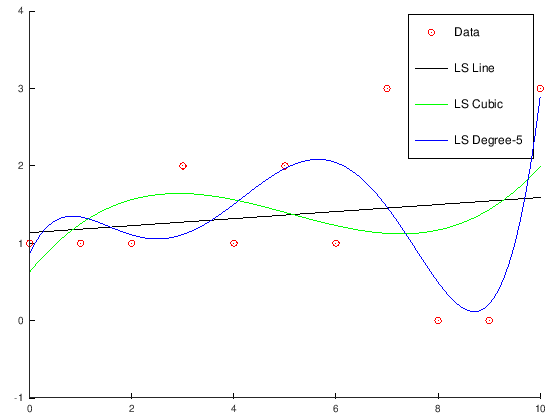

In [11]:
plotlscurves(X,Y) %Plot the data along with the splines